# **LAP 1 : DATA PREPARATION !!**

---



## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px"><b>

1. [EXAMINE THE DATASET](#1)<br>
2. [NARROW DOWN THE FEATURES](#2)<br>
3. [FEATURE ENGINEERING](#3)<br>
4. [PREPARE FEATURES FOR ML](#4)<br>
5. [SPLIT DATA INTO "TRAIN-VAL-TEST" SET](#5)<br>
6. [CREATE X AND Y SPLIT FOR IN AND OUT DATA](#6)<br>
7. [SAVING THE DATASETS](#7)<br>
</b></div>
<hr>

**OBJECTIVE :**

**...... is to build a ML model using past data to predict the probability of default.**

**This will help the company in deciding whether or not to pass the loan.**

In [ ]:
# This project consists of four jupyter notebooks. Source data is downloaded from the internet.
# A folder called LAP is created in the google drive where source data and all outputs are saved.
# This folder is accessed by other notebooks of this group.
# Can delete the folder LAP after running all four notebooks.

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###          IMPORT LIBRARIES & SET OPTIONS

In [ ]:
!pip install imblearn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime, date, time
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

pd.set_option('display.max_columns', 200)
pd.set_option('max_colwidth', 30)
pd.set_option('display.max_rows', 100)

plt.style.use('default')
plt.rcParams['figure.figsize'] = (8,5)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings("ignore")
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

## 1:  EXAMINING THE DATA SET       <a id="1"></a>

###             LOAD DATA INTO PANDAS

In [ ]:
# File ID from your Google Drive share link
FILE_ID = '1sIyXtHoEcJH8Fwy_yipmC8O_2zsPOAAu'

# Save to google drive folder
!mkdir /content/drive/MyDrive/LAP
path = '/content/drive/MyDrive/LAP'
!gdown $FILE_ID --output $path/LendingData.txt

mkdir: cannot create directory ‘/content/drive/MyDrive/LAP’: File exists
Downloading...
From (original): https://drive.google.com/uc?id=1sIyXtHoEcJH8Fwy_yipmC8O_2zsPOAAu
From (redirected): https://drive.google.com/uc?id=1sIyXtHoEcJH8Fwy_yipmC8O_2zsPOAAu&confirm=t&uuid=b05e084f-a83d-4bd5-ade6-9a8aa75088a2
To: /content/drive/MyDrive/LAP/LendingData.txt
100% 361M/361M [00:08<00:00, 41.8MB/s]


In [ ]:
df_loans = pd.read_csv(path + '/LendingData.txt',sep='\t', low_memory=False)

###             DATA INTEGRITY CHECKS

In [ ]:
df_loans.shape
df_loans.head(3)
df_loans.tail(3)

(855969, 73)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,n,Borrower added on 12/22/...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,n,Borrower added on 12/22/...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,n,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.0,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
855966,36271333,38982739,13000.0,13000.0,13000.0,60 months,15.99,316.07,D,D2,Radiologist Technologist,5 years,RENT,35000.0,Verified,Jan-2015,n,NaN,debt_consolidation,Debt consolidation,378xx,TN,30.90,0.0,Sep-2003,0.0,NaN,84.0,9.0,1.0,11031.0,61.3,22.0,w,11155.50,11155.50,3769.74,3769.74,1844.50,1925.24,0.0,0.0,0.0,Jan-2016,316.07,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,34178.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18000.0,NaN,NaN,NaN,0
855967,36490806,39222577,12000.0,12000.0,12000.0,60 months,19.99,317.86,E,E3,Painter,1 year,RENT,64400.0,Source Verified,Jan-2015,n,NaN,debt_consolidation,Debt consolidation,010xx,MA,27.19,1.0,Oct-2003,2.0,22.0,NaN,17.0,0.0,8254.0,30.6,20.0,w,10447.31,10447.31,3787.67,3787.67,1552.69,2234.98,0.0,0.0,0.0,Jan-2016,317.86,Feb-2016,Jan-2016,1.0,22.0,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,58418.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27000.0,NaN,NaN,NaN,0
855968,36271262,38982659,20000.0,20000.0,20000.0,36 months,11.99,664.20,B,B5,Manager Hotel Operations O...,10+ years,RENT,100000.0,Verified,Jan-2015,n,NaN,credit_card,Credit card refinancing,331xx,FL,10.83,0.0,Dec-2001,1.0,NaN,110.0,8.0,1.0,33266.0,79.8,10.0,f,14110.94,14110.94,7943.76,7943.76,5889.06,2054.70,0.0,0.0,0.0,Jan-2016,664.20,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,33307.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41700.0,NaN,NaN,NaN,0


In [ ]:
df_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           855969 non-null  int64  
 1   member_id                    855969 non-null  int64  
 2   loan_amnt                    855969 non-null  float64
 3   funded_amnt                  855969 non-null  float64
 4   funded_amnt_inv              855969 non-null  float64
 5   term                         855969 non-null  object 
 6   int_rate                     855969 non-null  float64
 7   installment                  855969 non-null  float64
 8   grade                        855969 non-null  object 
 9   sub_grade                    855969 non-null  object 
 10  emp_title                    806526 non-null  object 
 11  emp_length                   812908 non-null  object 
 12  home_ownership               855969 non-null  object 
 13 

In [ ]:
df_loans.index #....................Row index:KEY
df_loans.index.values

RangeIndex(start=0, stop=855969, step=1)

array([     0,      1,      2, ..., 855966, 855967, 855968])

In [ ]:
# Check for duplicate records in data
df_loans.duplicated().sum()

0

In [ ]:
# Check for unique values in each column
df_loans.nunique()

,0
id,855969
member_id,855969
loan_amnt,1368
funded_amnt,1368
funded_amnt_inv,8818
term,2
int_rate,520
installment,67349
grade,7
sub_grade,35


In [ ]:
# Inspecting the Null values
df_loans.isnull().sum(axis=0)

,0
id,0
member_id,0
loan_amnt,0
funded_amnt,0
funded_amnt_inv,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0


In [ ]:
# Showing MV's (column-wise) as percentages of total length of column.
round(100*(df_loans.isnull().sum()/len(df_loans.index)),2)

,0
id,0.00
member_id,0.00
loan_amnt,0.00
funded_amnt,0.00
funded_amnt_inv,0.00
term,0.00
int_rate,0.00
installment,0.00
grade,0.00
sub_grade,0.00


###             DROP COLUMNS WITH MORE THAN 10% MISSING VALUES

In [ ]:
drop_count = len(df_loans) * 0.1
df_loans = df_loans.dropna(thresh=drop_count,axis=1)

In [ ]:
len(df_loans.columns)
df_loans.info()

56

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 56 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           855969 non-null  int64  
 1   member_id                    855969 non-null  int64  
 2   loan_amnt                    855969 non-null  float64
 3   funded_amnt                  855969 non-null  float64
 4   funded_amnt_inv              855969 non-null  float64
 5   term                         855969 non-null  object 
 6   int_rate                     855969 non-null  float64
 7   installment                  855969 non-null  float64
 8   grade                        855969 non-null  object 
 9   sub_grade                    855969 non-null  object 
 10  emp_title                    806526 non-null  object 
 11  emp_length                   812908 non-null  object 
 12  home_ownership               855969 non-null  object 
 13 

In [ ]:
df_loans = df_loans.drop(['desc'],axis=1)      # This columns is not useful in the present form.

In [ ]:
df_loans.shape

(855969, 55)

###  CREATE SUMBISSION FILE
(ADD FINAL PREDICTION RESULTS AT THE END)

In [ ]:
df_loans.loc[:5,['id','loan_amnt','default_ind']]
df_sub = df_loans.loc[:,['id','loan_amnt','default_ind']]
df_sub.head(); df_sub.info()

,id,loan_amnt,default_ind
0,1077501,5000.0,0
1,1077430,2500.0,1
2,1077175,2400.0,0
3,1076863,10000.0,0
4,1075358,3000.0,0
5,1075269,5000.0,0


,id,loan_amnt,default_ind
0,1077501,5000.0,0
1,1077430,2500.0,1
2,1077175,2400.0,0
3,1076863,10000.0,0
4,1075358,3000.0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   id           855969 non-null  int64  
 1   loan_amnt    855969 non-null  float64
 2   default_ind  855969 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 19.6 MB


##  2:  NARROWING DOWN THE COLUMNS            <a id="2"></a>

###             LOAD DATA DICTIONARY INTO PANDAS

In [ ]:
!pip install openpyxl

In [ ]:
# File ID from your Google Drive share link
FILE_ID = '1HLga3sm-sNLWxIpZNBe6KzkET0X31QeR'

# Save to google drive folder
!gdown $FILE_ID --output $path/DataDictionary.xlsx

Downloading...
From: https://drive.google.com/uc?id=1HLga3sm-sNLWxIpZNBe6KzkET0X31QeR
To: /content/drive/MyDrive/LAP/DataDictionary.xlsx
100% 8.82k/8.82k [00:00<00:00, 20.6MB/s]


In [ ]:
data_dictionary = pd.read_excel(path + '/DataDictionary.xlsx')
data_dictionary.shape[0]
data_dictionary.columns.tolist()
data_dictionary

73

['LoanStatNew', 'Description']

,LoanStatNew,Description
0,addr_state,The state provided by the ...
1,annual_inc,The self-reported annual i...
2,annual_inc_joint,The combined self-reported...
3,application_type,Indicates whether the loan...
4,collection_recovery_fee,post charge off collection...
5,collections_12_mths_ex_med,Number of collections in 1...
6,delinq_2yrs,The number of 30+ days pas...
7,desc,Loan description provided ...
8,dti,A ratio calculated using t...
9,dti_joint,A ratio calculated using t...


The 73rd row 'default_ind' doesn't seem to be present in the Data Dictionary excel file, so adding it manually.

In [ ]:
dd = pd.DataFrame({'LoanStatNew':['default_ind'],
                   'Description':['Current status of the loan']},
                   index=[73])
dd

,LoanStatNew,Description
73,default_ind,Current status of the loan


In [ ]:
data_dictionary = pd.concat([data_dictionary,dd])

### RENAMING THE DATA DICTIONARY COLUMNS

In [ ]:
data_dictionary = data_dictionary.rename(columns={'LoanStatNew': 'name', 'Description': 'description'})
data_dictionary.head()

,name,description
0,addr_state,The state provided by the ...
1,annual_inc,The self-reported annual i...
2,annual_inc_joint,The combined self-reported...
3,application_type,Indicates whether the loan...
4,collection_recovery_fee,post charge off collection...


###             CREATE DF WITH LOAN DATA-TYPES FOR Feature Selection

In [ ]:
df_loans_dtypes = pd.DataFrame(df_loans.dtypes,columns=['dtypes'])
df_loans_dtypes = df_loans_dtypes.reset_index()
df_loans_dtypes['name'] = df_loans_dtypes['index']
df_loans_dtypes = df_loans_dtypes[['name','dtypes']]
df_loans_dtypes['first value'] = df_loans.iloc[0].values
df_loans_dtypes['second value'] = df_loans.iloc[1].values
df_loans_dtypes['last value'] = df_loans.iloc[-1].values
df_loans_dtypes.head()

,name,dtypes,first value,second value,last value
0,id,int64,1077501,1077430,36271262
1,member_id,int64,1296599,1314167,38982659
2,loan_amnt,float64,5000.0,2500.0,20000.0
3,funded_amnt,float64,5000.0,2500.0,20000.0
4,funded_amnt_inv,float64,4975.0,2500.0,20000.0


###             MERGE IT WITH DATA DICTIONARY

In [ ]:
df_feat = df_loans_dtypes.merge(data_dictionary, on='name',how='left')
df_feat.shape
df_feat.head()
df_feat.tail()

(55, 6)

,name,dtypes,first value,second value,last value,description
0,id,int64,1077501,1077430,36271262,A unique assigned ID for t...
1,member_id,int64,1296599,1314167,38982659,A unique Id for the borrow...
2,loan_amnt,float64,5000.0,2500.0,20000.0,The listed amount of the l...
3,funded_amnt,float64,5000.0,2500.0,20000.0,The total amount committed...
4,funded_amnt_inv,float64,4975.0,2500.0,20000.0,The total amount committed...


,name,dtypes,first value,second value,last value,description
50,acc_now_delinq,float64,0.0,0.0,0.0,The number of accounts on ...
51,tot_coll_amt,float64,NaN,NaN,0.0,Total collection amounts e...
52,tot_cur_bal,float64,NaN,NaN,33307.0,Total current balance of a...
53,total_rev_hi_lim,float64,NaN,NaN,41700.0,NaN
54,default_ind,int64,0,1,0,Current status of the loan


###             SELECT UNIMPORTANT FEATURES TO BE DROPED

In [ ]:
df_feat[:19]

,name,dtypes,first value,second value,last value,description
0,id,int64,1077501,1077430,36271262,A unique assigned ID for t...
1,member_id,int64,1296599,1314167,38982659,A unique Id for the borrow...
2,loan_amnt,float64,5000.0,2500.0,20000.0,The listed amount of the l...
3,funded_amnt,float64,5000.0,2500.0,20000.0,The total amount committed...
4,funded_amnt_inv,float64,4975.0,2500.0,20000.0,The total amount committed...
5,term,object,36 months,60 months,36 months,The number of payments on ...
6,int_rate,float64,10.65,15.27,11.99,Interest Rate on the loan
7,installment,float64,162.87,59.83,664.2,The monthly payment owed b...
8,grade,object,B,C,B,XYZ corp. assigned loan grade
9,sub_grade,object,B2,C4,B5,XYZ assigned assigned loan...


In [ ]:
a = 0
for name in (df_feat['name'][:19]):
    print(a," Unique Values in column: {}\n".format(name))
    print(df_loans[name].value_counts(),'\n'); a += 1

0  Unique Values in column: id

id
1077501     1
60954075    1
60812149    1
60719227    1
60913560    1
           ..
29173989    1
29053518    1
29133990    1
29163866    1
36271262    1
Name: count, Length: 855969, dtype: int64 

1  Unique Values in column: member_id

member_id
1296599     1
64995888    1
64843953    1
64760939    1
64955388    1
           ..
31717175    1
31576692    1
31677173    1
31707050    1
38982659    1
Name: count, Length: 855969, dtype: int64 

2  Unique Values in column: loan_amnt

loan_amnt
10000.0    59793
12000.0    48618
15000.0    45654
20000.0    45352
35000.0    34854
           ...  
750.0          1
950.0          1
700.0          1
725.0          1
800.0          1
Name: count, Length: 1368, dtype: int64 

3  Unique Values in column: funded_amnt

funded_amnt
10000.0    59700
12000.0    48527
15000.0    45542
20000.0    45171
35000.0    34716
           ...  
800.0          1
750.0          1
950.0          1
700.0          1
725.0          1
Na

In [ ]:
drop_list = ['id','member_id','funded_amnt','funded_amnt_inv','sub_grade','emp_title']
df_loans = df_loans.drop(drop_list, axis=1)
df_loans.shape

(855969, 49)

In [ ]:
df_feat[19:38]

,name,dtypes,first value,second value,last value,description
19,zip_code,object,860xx,309xx,331xx,The first 3 numbers of the...
20,addr_state,object,AZ,GA,FL,The state provided by the ...
21,dti,float64,27.65,1.0,10.83,A ratio calculated using t...
22,delinq_2yrs,float64,0.0,0.0,0.0,The number of 30+ days pas...
23,earliest_cr_line,object,Jan-1985,Apr-1999,Dec-2001,The month the borrower's e...
24,inq_last_6mths,float64,1.0,5.0,1.0,The number of inquiries in...
25,mths_since_last_delinq,float64,NaN,NaN,NaN,The number of months since...
26,mths_since_last_record,float64,NaN,NaN,110.0,The number of months since...
27,open_acc,float64,3.0,3.0,8.0,The number of open credit ...
28,pub_rec,float64,0.0,0.0,1.0,Number of derogatory publi...


In [ ]:
b = 19
for name in (df_feat['name'][19:38]):
    print(b," Unique Values in column: {}\n".format(name))
    print(df_loans[name].value_counts(),'\n'); b += 1

19  Unique Values in column: zip_code

zip_code
945xx    9466
750xx    9111
112xx    8894
606xx    8370
300xx    7820
         ... 
503xx       1
889xx       1
524xx       1
888xx       1
507xx       1
Name: count, Length: 931, dtype: int64 

20  Unique Values in column: addr_state

addr_state
CA    125172
NY     71114
TX     68708
FL     58639
IL     34379
NJ     32061
PA     30250
OH     28651
GA     28043
VA     25234
NC     23787
MI     22175
MD     20209
MA     19835
AZ     19693
WA     18816
CO     18211
MN     15424
MO     13743
IN     13348
CT     13042
TN     12392
NV     11972
WI     11199
AL     10732
OR     10562
SC     10302
LA     10186
KY      8299
OK      7759
KS      7693
AR      6399
UT      6055
NM      4757
HI      4380
WV      4247
NH      4156
RI      3753
MS      3653
MT      2466
DE      2402
DC      2382
AK      2134
WY      1974
VT      1753
SD      1745
NE      1124
ME       491
ND       452
ID         9
IA         7
Name: count, dtype: int64 

21  Unique Val

In [ ]:
drop_cols = ['zip_code','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp']
df_loans = df_loans.drop(drop_cols, axis=1)
df_loans.shape

(855969, 43)

In [ ]:
df_feat[38:]

,name,dtypes,first value,second value,last value,description
38,total_rec_int,float64,861.07,435.17,2054.7,Interest received to date
39,total_rec_late_fee,float64,0.0,0.0,0.0,Late fees received to date
40,recoveries,float64,0.0,117.08,0.0,post charge off gross reco...
41,collection_recovery_fee,float64,0.0,1.11,0.0,post charge off collection...
42,last_pymnt_d,object,Jan-2015,Apr-2013,Jan-2016,Last month payment was rec...
43,last_pymnt_amnt,float64,171.62,119.66,664.2,Last total payment amount ...
44,next_pymnt_d,object,NaN,NaN,Feb-2016,Next scheduled payment date
45,last_credit_pull_d,object,Jan-2016,Sep-2013,Jan-2016,The most recent month XYZ ...
46,collections_12_mths_ex_med,float64,0.0,0.0,0.0,Number of collections in 1...
47,mths_since_last_major_derog,float64,NaN,NaN,NaN,Months since most recent 9...


In [ ]:
c = 38
for name in (df_feat['name'][38:]):
    print(c," Unique Values in column: {}\n".format(name))
    print(df_loans[name].value_counts(),'\n'); c += 1

38  Unique Values in column: total_rec_int

total_rec_int
0.00       9362
82.76       138
71.33       123
174.90      123
283.29      119
           ... 
7057.90       1
2115.22       1
2531.09       1
9467.08       1
2234.98       1
Name: count, Length: 317683, dtype: int64 

39  Unique Values in column: total_rec_late_fee

total_rec_late_fee
0.000000      845995
15.000000       2248
30.000000        249
45.000000         28
16.370000         15
               ...  
119.878520         1
14.955329          1
29.245338          1
14.966255          1
32.230000          1
Name: count, Length: 5386, dtype: int64 

40  Unique Values in column: recoveries

recoveries
0.00       831782
200.00         10
11.70           9
14.28           9
10.40           8
            ...  
1718.67         1
690.76          1
953.27          1
2152.39         1
5834.18         1
Name: count, Length: 22627, dtype: int64 

41  Unique Values in column: collection_recovery_fee

collection_recovery_fee
0.0000    

In [ ]:
drop_cols = ['total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt']
df_loans = df_loans.drop(drop_cols, axis=1)
df_loans.shape

(855969, 37)

{id, member_id} — **RANDOMLY GENERATED FIELD** that don’t affect the borrower’s ability to pay back the loan, and is used for identification purposes only.

{sub_grade} — contains **REDUNDANT INFORMATION** that is already in 'grade'.

{emp_title} — requires **MORE DATA and PROCESSING** to be useful.

{zip_code} – **MOSTLY REDUNDANT** with the 'addr_state' column as only the first 3 digits of the 5 digit zip code are visible.

{funded_amnt, funded_amnt_inv, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt} - **LEAKS INFORMATION FROM THE FUTURE** (after the loan has already been funded),  which can cause the model to overfit. This is because the model would be also learning from features that wouldn’t be available when we’re using it to make predictions on future loans.


###             DECIDE ON A TARGET COLUMN

In [ ]:
# Our main goal is to predict who will pay off a loan and who will default.
df_feat[df_feat.name == 'default_ind']  #........display its description
df_loans["default_ind"].value_counts()

,name,dtypes,first value,second value,last value,description
54,default_ind,int64,0,1,0,Current status of the loan


,count
default_ind,
0,809502
1,46467


###             VISUALIZING THE TARGET COLUMN OUTCOMES

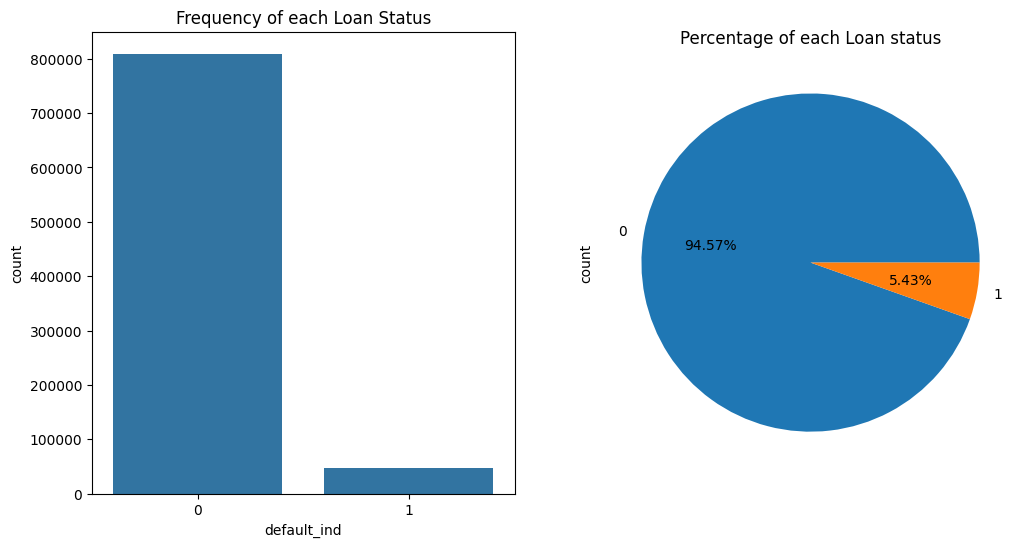

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(12,6))
sns.countplot(x='default_ind',data=df_loans,ax=axs[0])
axs[0].set_title("Frequency of each Loan Status")
df_loans['default_ind'].value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')
axs[1].set_title("Percentage of each Loan status")
plt.show();

###             REMOVE COLUMNS WITH ONLY ONE VALUE

In [ ]:
print("Columns with only one value are : \n", df_loans.columns.values[df_loans.apply(pd.Series.nunique) == 1])

Columns with only one value are : 
 ['policy_code']


In [ ]:
# Remove the above columns from the dataframe
df_loans = df_loans.loc[:,df_loans.apply(pd.Series.nunique) != 1]
df_loans.shape

(855969, 36)

###             REMOVE COLUMNS WITH INSIGNIFICANT FREQUENCY FOR OTHERS

In [ ]:
for col in df_loans.columns:
    if (len(df_loans[col].unique()) < 4):
        print(df_loans[col].value_counts())
        print()

term
36 months    600221
60 months    255748
Name: count, dtype: int64

verification_status
Source Verified    318178
Verified           280049
Not Verified       257742
Name: count, dtype: int64

pymnt_plan
n    855964
y         5
Name: count, dtype: int64

initial_list_status
f    442555
w    413414
Name: count, dtype: int64

application_type
INDIVIDUAL    855527
JOINT            442
Name: count, dtype: int64

default_ind
0    809502
1     46467
Name: count, dtype: int64



In [ ]:
# The pymnt_plan and application_type as having insignificant frequency. So drop them.
s = df_loans.shape[1]
df_loans = df_loans.drop(['pymnt_plan','application_type'], axis=1)
print("So now the features are reduced  from {} to => {}".format(s,df_loans.shape[1]))

So now the features are reduced  from 36 to => 34


In [ ]:
#             SAVE TO DF & CSV
df_clean = pd.DataFrame(df_loans)
df_clean.shape

df_loans.to_csv(path + '/df_loans_clean.csv', index=False)

(855969, 34)

##  3: FEATURE ENGINEERING           <a id="3"></a>

In [ ]:
# read df_clean from csv file
# df_clean = pd.read_csv("df_loans_clean.csv")

In [ ]:
df_clean.shape; df_clean.head()

(855969, 34)

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
0,5000.0,36 months,10.65,162.87,B,10+ years,RENT,24000.0,Verified,Dec-2011,credit_card,Computer,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,NaN,Jan-2016,0.0,NaN,0.0,NaN,NaN,NaN,0
1,2500.0,60 months,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,Dec-2011,car,bike,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,NaN,Sep-2013,0.0,NaN,0.0,NaN,NaN,NaN,1
2,2400.0,36 months,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,Dec-2011,small_business,real estate business,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,NaN,Jan-2016,0.0,NaN,0.0,NaN,NaN,NaN,0
3,10000.0,36 months,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,Dec-2011,other,personel,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,NaN,Jan-2015,0.0,NaN,0.0,NaN,NaN,NaN,0
4,3000.0,60 months,12.69,67.79,B,1 year,RENT,80000.0,Source Verified,Dec-2011,other,Personal,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,Feb-2016,Jan-2016,0.0,NaN,0.0,NaN,NaN,NaN,0


###  CREATE THREE NEW FEATURES : Monthly Income, EMI AND Total Balance

**Monthly Income** - We shall create this from annual_inc.

In [ ]:
df_clean['monthly_inc'] = (df_clean['annual_inc'] / 12).round(2)

**EMI** - Burrowers with high EMI are more likely to default.

In [ ]:
# Extract the month in 'term' column and make it integer type.
df_clean['term'].tail()
tmp1 = df_clean['term'].str.extract('(\d+)')
df_clean['term'] = tmp1[0].astype(int)
df_clean['term'].tail()

,term
855964,36 months
855965,36 months
855966,60 months
855967,60 months
855968,36 months


,term
855964,36
855965,36
855966,60
855967,60
855968,36


In [ ]:
df_clean['EMI'] = (df_clean['loan_amnt'] / df_clean['term']).round(2)

**Total Balance** - If this figure after monthly debits (like EMI) is high then the burrower is more likely to pay up.

In [ ]:
df_clean['tot_bal'] = df_clean['monthly_inc'] - df_clean['EMI']

In [ ]:
# Check on the newly created features.
df_clean.shape; df_clean.tail()

(855969, 37)

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind,monthly_inc,EMI,tot_bal
855964,10000.0,36,11.99,332.10,B,8 years,RENT,31000.0,Verified,Jan-2015,debt_consolidation,Debt consolidation,CA,28.69,0.0,Sep-2004,0.0,NaN,77.0,9.0,1.0,14037.0,82.1,15.0,f,Feb-2016,Jan-2016,0.0,NaN,0.0,0.0,25274.0,17100.0,0,2583.33,277.78,2305.55
855965,24000.0,36,11.99,797.03,B,10+ years,MORTGAGE,79000.0,Verified,Jan-2015,home_improvement,Home improvement,NJ,3.90,0.0,Mar-1974,1.0,26.0,NaN,5.0,0.0,8621.0,84.5,23.0,f,Feb-2016,Jan-2016,0.0,29.0,0.0,0.0,140285.0,10200.0,0,6583.33,666.67,5916.66
855966,13000.0,60,15.99,316.07,D,5 years,RENT,35000.0,Verified,Jan-2015,debt_consolidation,Debt consolidation,TN,30.90,0.0,Sep-2003,0.0,NaN,84.0,9.0,1.0,11031.0,61.3,22.0,w,Feb-2016,Jan-2016,0.0,NaN,0.0,0.0,34178.0,18000.0,0,2916.67,216.67,2700.00
855967,12000.0,60,19.99,317.86,E,1 year,RENT,64400.0,Source Verified,Jan-2015,debt_consolidation,Debt consolidation,MA,27.19,1.0,Oct-2003,2.0,22.0,NaN,17.0,0.0,8254.0,30.6,20.0,w,Feb-2016,Jan-2016,1.0,22.0,0.0,0.0,58418.0,27000.0,0,5366.67,200.00,5166.67
855968,20000.0,36,11.99,664.20,B,10+ years,RENT,100000.0,Verified,Jan-2015,credit_card,Credit card refinancing,FL,10.83,0.0,Dec-2001,1.0,NaN,110.0,8.0,1.0,33266.0,79.8,10.0,f,Feb-2016,Jan-2016,0.0,NaN,0.0,0.0,33307.0,41700.0,0,8333.33,555.56,7777.77


### DROP CORRELATED COLUMNS 'installment' AND 'annual_inc'
**as 'EMI' and 'monthly_inc' has the same information in a better format**

In [ ]:
df_clean.shape
df_clean = df_clean.drop(['annual_inc','installment'], axis=1); df_clean.shape

(855969, 37)

(855969, 35)

### REMOVING THE OUTLIER VALUES IN 'DTI' COLUMN

In [ ]:
df_clean['dti'].describe()

,dti
count,855969.000000
mean,18.122165
std,17.423629
min,0.000000
25%,11.880000
50%,17.610000
75%,23.900000
max,9999.000000


In [ ]:
df_clean['dti'][df_clean['dti'] > 100]

,dti
454491,1092.52
455963,137.40
462577,9999.00
466829,100.09
498969,120.66
508976,9999.00
509784,380.53
517482,672.52
521134,125.25
540528,104.00


There seems to be a few. We shall go ahead and remove the tailing 4 rows for now.

In [ ]:
# Removing the outliers
df_clean.shape
df_clean.drop(index=[454491,462577,508976,517482], inplace=True)
df_clean.shape

(855969, 35)

(855965, 35)

###  CAPTURING ROW CHANGES ON TO THE SUBMISSION FILE

In [ ]:
# Check 'default_ind' status for affected rows in df_clean.
df_clean.loc[:,['dti','default_ind']][df_clean['dti'] > 100]

,dti,default_ind
455963,137.40,0
466829,100.09,0
498969,120.66,0
509784,380.53,0
521134,125.25,0
540528,104.00,0


In [ ]:
# Check 'default_ind' status for affected rows in df_sub.
df_sub.loc[[454491,462577,508976,517482],:]

,id,loan_amnt,default_ind
454491,67405134,6550.0,0
462577,66415476,20000.0,0
508976,65199509,3700.0,0
517482,64078746,12000.0,0


In [ ]:
# drop those rows in df_sub.
df_sub.shape
df_sub.drop(index=[454491,462577,508976,517482], inplace=True)
df_sub.shape

(855969, 3)

(855965, 3)

##  4: PREPARING THE FEATURES FOR MACHINE LEARNING   <a id="4"></a>

###             HANDLE MISSING VALUES

In [ ]:
null_counts = df_clean.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
loan_amnt                           0
term                                0
int_rate                            0
grade                               0
emp_length                      43057
home_ownership                      0
verification_status                 0
issue_d                             0
purpose                             0
title                              34
addr_state                          0
dti                                 0
delinq_2yrs                         0
earliest_cr_line                    0
inq_last_6mths                      0
mths_since_last_delinq         439811
mths_since_last_record         724781
open_acc                            0
pub_rec                             0
revol_bal                           0
revol_util                        446
total_acc                           0
initial_list_status                 0
next_pymnt_d                   252971
last_credit_pull_d                 50
collections_

#### Removing COLUMNS with more than 1% of the rows containing nulls.

In [ ]:
onePlus = null_counts[(((null_counts/df_clean.shape[0])*100) > 1)]; onePlus

,0
emp_length,43057
mths_since_last_delinq,439811
mths_since_last_record,724781
next_pymnt_d,252971
mths_since_last_major_derog,642828
tot_coll_amt,67313
tot_cur_bal,67313
total_rev_hi_lim,67313


In [ ]:
# Remove "COLUMNS" entirely where more than 1% of the rows for that column contains a null value.
df_clean = df_clean.drop(onePlus.index, axis=1)
df_clean.shape

(855965, 27)

#### Removing ROWS with less than 1% of nulls in columns.

In [ ]:
null_counts[(((null_counts/df_clean.shape[0])*100) < 1) & (((null_counts/df_clean.shape[0])*100) > 0)]

,0
title,34
revol_util,446
last_credit_pull_d,50
collections_12_mths_ex_med,56


In [ ]:
# Firstly capture the dropped rows for similar deletion from SUBMISSION FILE.
idx = df_clean.loc[pd.isnull(df_clean).any(axis=1)]; len(idx); idx.head()

585

,loan_amnt,term,int_rate,grade,home_ownership,verification_status,issue_d,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,default_ind,monthly_inc,EMI,tot_bal
3563,8000.0,36,19.42,E,RENT,Source Verified,Nov-2011,debt_consolidation,Dent Consolidation,IL,18.56,0.0,Sep-1992,1.0,6.0,0.0,0.0,NaN,10.0,f,Dec-2015,0.0,0.0,0,2500.00,222.22,2277.78
4712,6100.0,36,14.27,C,MORTGAGE,Verified,Nov-2011,home_improvement,luckycookie,MO,23.95,0.0,May-2002,0.0,2.0,0.0,0.0,NaN,4.0,f,Nov-2012,0.0,0.0,1,1979.00,169.44,1809.56
4942,7200.0,36,14.27,C,RENT,Not Verified,Oct-2011,debt_consolidation,legal expenses,CA,15.28,0.0,Mar-1997,0.0,2.0,0.0,0.0,NaN,25.0,f,Mar-2014,0.0,0.0,0,4000.00,200.00,3800.00
11269,5000.0,36,21.36,F,MORTGAGE,Not Verified,Jul-2011,home_improvement,home project loan,WA,21.91,0.0,Dec-2007,2.0,2.0,0.0,0.0,NaN,5.0,f,Feb-2015,0.0,0.0,0,2916.67,138.89,2777.78
12026,3000.0,60,22.11,G,OWN,Source Verified,Jul-2011,other,bill loan,MN,0.00,0.0,Jan-2008,0.0,3.0,0.0,0.0,NaN,5.0,f,Apr-2012,0.0,0.0,1,1471.00,50.00,1421.00


In [ ]:
# DROP same rows from  SUBMISSION FILE.
df_sub.shape
df_sub = df_sub.drop(index=idx.index.values)
df_sub.shape

(855965, 3)

(855380, 3)

In [ ]:
# Remove only those "ROWS" where less than 1% of nulls for that column in df_clean.
df_clean = df_clean.dropna()
df_clean.shape

(855380, 27)

In [ ]:
# Final Check
null_counts = df_clean.isnull().sum()
print("Number of null values left in each column:\n{}".format(null_counts))

Number of null values left in each column:
loan_amnt                     0
term                          0
int_rate                      0
grade                         0
home_ownership                0
verification_status           0
issue_d                       0
purpose                       0
title                         0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
last_credit_pull_d            0
collections_12_mths_ex_med    0
acc_now_delinq                0
default_ind                   0
monthly_inc                   0
EMI                           0
tot_bal                       0
dtype: int64


### FINDING OUTLIERS

In [ ]:
# Function to check if outliers are present
otlr = []

def check_outliers():
    ## FINDING Upper and Lower Limits for Outlier Removal
    ncol = list(df_clean.describe().columns)
    desc = df_clean.describe()
    iqr = df_clean[ncol].quantile(0.75) - df_clean[ncol].quantile(0.25)
    ll = df_clean[ncol].quantile(0.25) - 1.5 * iqr
    ll.name = 'lowLim'
    ul = df_clean[ncol].quantile(0.75) + 1.5 * iqr
    ul.name = 'uprLim'
    desc = pd.concat([desc, pd.DataFrame([ll,ul])])

    ## FINDING which features have OUTLIERS
    for col in desc:
        if ((desc[col].iloc[3] < desc[col].iloc[8]) or (desc[col].iloc[7] > desc[col].iloc[9])):
          otlr.append(col)
    print('Columns with outliers are :', otlr)
    return otlr, desc

otlr, desc = check_outliers()
desc.T

Columns with outliers are : ['int_rate', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'collections_12_mths_ex_med', 'acc_now_delinq', 'default_ind', 'monthly_inc', 'EMI', 'tot_bal']


,count,mean,std,min,25%,50%,75%,max,lowLim,uprLim
loan_amnt,855380.0,14747.490501,8424.339785,500.00,8000.00,13000.00,20000.00,35000.00,-10000.000,38000.000
term,855380.0,43.171998,10.985925,36.00,36.00,36.00,60.00,60.00,0.000,96.000
int_rate,855380.0,13.191403,4.368147,5.32,9.99,12.99,15.99,28.99,0.990,24.990
dti,855380.0,18.099608,8.304062,0.00,11.89,17.62,23.90,380.53,-6.125,41.915
delinq_2yrs,855380.0,0.311484,0.856925,0.00,0.00,0.00,0.00,39.00,0.000,0.000
inq_last_6mths,855380.0,0.681006,0.964051,0.00,0.00,0.00,1.00,8.00,-1.500,2.500
open_acc,855380.0,11.546307,5.306729,1.00,8.00,11.00,14.00,90.00,-1.000,23.000
pub_rec,855380.0,0.194629,0.581739,0.00,0.00,0.00,0.00,86.00,0.000,0.000
revol_bal,855380.0,16914.362919,22213.358862,0.00,6475.00,11908.00,20861.00,2904836.00,-15104.000,42440.000
revol_util,855380.0,55.021567,23.810197,0.00,37.60,55.90,73.50,892.30,-16.250,127.350


### REMOVING THE OUTLIERS (TRIMMING)

In [ ]:
# Check if indexes are similar
pd.Series(df_clean.index).compare(pd.Series(df_sub.index))

,self,other


In [ ]:
# Print the original shape of the DataFrame
print("Original Shape: ", df_clean.shape)
otlr_1 = ['dti', 'inq_last_6mths', 'monthly_inc', 'open_acc', 'revol_bal', 'revol_util', 'tot_bal', 'total_acc']

for out in otlr_1:
    df_clean = df_clean[(df_clean[out] >= desc[out].iloc[8]) & (df_clean[out] <= desc[out].iloc[9])]

# Print the new shape of the DataFrame
print("New Shape: ", df_clean.shape)

Original Shape:  (855380, 27)
New Shape:  (709462, 27)


In [ ]:
# Effecting ROW changes to SUBMISSION File as well
df_sub.shape
df_sub = df_sub.loc[df_clean.index]
df_sub.shape

(855380, 3)

(709462, 3)

### CAPPING THE OUTLIERS (WINSORIZATION)

In [ ]:
# Create arrays of Boolean values indicating the outlier rows
otlr_2 = ['EMI', 'int_rate']

for out in otlr_2:
    df_clean[out] = np.where(df_clean[out] < desc[out].iloc[8], desc[out].iloc[8], df_clean[out])
    df_clean[out] = np.where(df_clean[out] > desc[out].iloc[9], desc[out].iloc[9], df_clean[out])

In [ ]:
# CHECK the effects -> Max/Min value should be equal to the earlier assigned UpperLimit/LowerLimit
otlr, desc = check_outliers()
print(otlr)
desc

Columns with outliers are : ['int_rate', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'collections_12_mths_ex_med', 'acc_now_delinq', 'default_ind', 'monthly_inc', 'EMI', 'tot_bal', 'int_rate', 'dti', 'delinq_2yrs', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'collections_12_mths_ex_med', 'acc_now_delinq', 'default_ind', 'monthly_inc', 'EMI', 'tot_bal']
['int_rate', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'collections_12_mths_ex_med', 'acc_now_delinq', 'default_ind', 'monthly_inc', 'EMI', 'tot_bal', 'int_rate', 'dti', 'delinq_2yrs', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'collections_12_mths_ex_med', 'acc_now_delinq', 'default_ind', 'monthly_inc', 'EMI', 'tot_bal']


,loan_amnt,term,int_rate,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,default_ind,monthly_inc,EMI,tot_bal
count,709462.000000,709462.000000,709462.000000,709462.000000,709462.000000,709462.000000,709462.000000,709462.00000,709462.000000,709462.000000,709462.000000,709462.000000,709462.000000,709462.000000,709462.000000,709462.000000,709462.000000
mean,13928.707528,42.945454,13.106584,18.023762,0.300598,0.506275,10.719838,0.19584,13221.717889,55.022632,23.434621,0.014342,0.004692,0.053722,5433.722803,322.476973,5108.841325
std,7876.241103,10.883553,4.269056,8.229666,0.827119,0.684568,4.320730,0.56630,9261.412837,23.643780,10.144337,0.132838,0.073449,0.225469,2390.827857,170.457656,2314.796222
min,500.000000,36.000000,5.320000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,250.000000,13.890000,216.670000
25%,8000.000000,36.000000,9.990000,11.880000,0.000000,0.000000,8.000000,0.00000,6125.000000,37.800000,16.000000,0.000000,0.000000,0.000000,3666.670000,200.000000,3382.500000
50%,12000.000000,36.000000,12.990000,17.520000,0.000000,0.000000,10.000000,0.00000,10993.000000,55.900000,22.000000,0.000000,0.000000,0.000000,5000.000000,277.780000,4694.440000
75%,19200.000000,60.000000,15.800000,23.740000,0.000000,1.000000,13.000000,0.00000,18293.000000,73.300000,30.000000,0.000000,0.000000,0.000000,6791.670000,416.670000,6433.330000
max,35000.000000,60.000000,24.990000,41.690000,39.000000,2.000000,23.000000,63.00000,42440.000000,127.300000,54.000000,20.000000,5.000000,1.000000,13125.000000,800.000000,12385.110000
lowLim,-8800.000000,0.000000,1.275000,-5.910000,0.000000,-1.500000,0.500000,0.00000,-12127.000000,-15.450000,-5.000000,0.000000,0.000000,0.000000,-1020.830000,-125.005000,-1193.745000
uprLim,36000.000000,96.000000,24.515000,41.530000,0.000000,2.500000,20.500000,0.00000,36545.000000,126.550000,51.000000,0.000000,0.000000,0.000000,11479.170000,741.675000,11009.575000


###             INVESTIGATE CATEGORICAL COLUMNS

In [ ]:
print("Data types and their frequency\n{}".format(df_clean.dtypes.value_counts()))

Data types and their frequency
float64    15
object     10
int64       2
Name: count, dtype: int64


In [ ]:
object_columns_df = df_clean.select_dtypes(include=['object'])
print(object_columns_df.iloc[0])

grade                            B
home_ownership                RENT
verification_status       Verified
issue_d                   Dec-2011
purpose                credit_card
title                     Computer
addr_state                      AZ
earliest_cr_line          Jan-1985
initial_list_status              f
last_credit_pull_d        Jan-2016
Name: 0, dtype: object


Of these ::

grade has **Ordinal Values**, and
        
home_ownership, verification_status, purpose, title, addr_state, initial_list_status have **Nominal Values**, and

issue_d, earliest_cr_line and last_credit_pull_d are **Date Columns**.

###             CONVERT CATEGORICAL COLUMNS TO NUMERIC FEATURES

#### Explore the unique value counts of the eight columns that seem like they contain categorical values

In [ ]:
cols = ['grade', 'home_ownership', 'verification_status', 'purpose', 'initial_list_status', 'addr_state', 'title']
for name in cols:
    print(name,':')
    print(object_columns_df[name].value_counts(),'\n')

grade :
grade
B    211234
C    198052
A    119980
D    108340
E     52423
F     16049
G      3384
Name: count, dtype: int64 

home_ownership :
home_ownership
MORTGAGE    336501
RENT        303107
OWN          69693
OTHER          119
NONE            39
ANY              3
Name: count, dtype: int64 

verification_status :
verification_status
Source Verified    263880
Not Verified       225857
Verified           219725
Name: count, dtype: int64 

purpose :
purpose
debt_consolidation    422501
credit_card           164741
home_improvement       38595
other                  34732
major_purchase         13689
small_business          7418
car                     7347
medical                 6854
moving                  4370
vacation                3877
house                   2706
wedding                 1923
renewable_energy         458
educational              251
Name: count, dtype: int64 

initial_list_status :
initial_list_status
f    368496
w    340966
Name: count, dtype: int64 

addr_s

The column addr_state has too many levels and can be removed.

#### Explore purpose and title, it appears to reflect the same information.

In [ ]:
for name in ['purpose','title']:
    print("Unique Values in column: {}\n".format(name))
    print(df_clean[name].value_counts(),'\n')

Unique Values in column: purpose

purpose
debt_consolidation    422501
credit_card           164741
home_improvement       38595
other                  34732
major_purchase         13689
small_business          7418
car                     7347
medical                 6854
moving                  4370
vacation                3877
house                   2706
wedding                 1923
renewable_energy         458
educational              251
Name: count, dtype: int64 

Unique Values in column: title

title
Debt consolidation                         330979
Credit card refinancing                    129604
Home improvement                            30053
Other                                       26072
Debt Consolidation                          12866
                                            ...  
pay it off faster                               1
Credit Card Diminisher                          1
DebConsol                                       1
pay off and improve                 

They do contain overlapping information, but the 'purpose' column contains fewer discrete values and is cleaner, so keeping 'purpose' and droping 'title'.

Also removing the date columns 'earliest_cr_line' and 'last_credit_pull_d' from the DataFrame, along with 'addr_state'.

In [ ]:
drop_cols = ['title','earliest_cr_line','last_credit_pull_d','addr_state']
df_clean = df_clean.drop(drop_cols,axis=1)
df_clean.shape

(709462, 23)

#### Convert categorical variable 'issue_d' to integer.

In [ ]:
h1 = pd.to_datetime(df_clean['issue_d'])   # ...................convert str to datetime
h2 = h1.apply(lambda t: date.toordinal(t))  # ...............convert datetime to int/ordinal
df_clean['issue_d'] = h2
type(df_clean['issue_d'][0])

numpy.int64

###             MAP ORDINAL VALUES TO INTEGERS

In [ ]:
mapping_dict = {"grade":{"A": 1,"B": 2,"C": 3,"D": 4,"E": 5,"F": 6,"G": 7}}
df_clean = df_clean.replace(mapping_dict)
df_clean[['grade']].head()

,grade
0,2
2,3
3,3
4,2
6,3


###             ENCODE NOMINAL VALUES AS DUMMY VARIABLES

In [ ]:
nominals = ['home_ownership', 'verification_status', 'purpose', 'initial_list_status']
dummy_df = pd.get_dummies(df_clean[nominals])
dummy_df.shape
df_clean.shape

(709462, 25)

(709462, 23)

In [ ]:
dummy_df.head()

,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_f,initial_list_status_w
0,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False
3,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False
4,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False


In [ ]:
df_clean = pd.concat([df_clean, dummy_df], axis=1)
df_clean = df_clean.drop(nominals, axis=1)
df_clean.shape
df_clean.head()

(709462, 44)

,loan_amnt,term,int_rate,grade,issue_d,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,default_ind,monthly_inc,EMI,tot_bal,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_f,initial_list_status_w
0,5000.0,36,10.65,2,734472,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0,0.0,0.0,0,2000.00,138.89,1861.11,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,2400.0,36,15.96,3,734472,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,10.0,0.0,0.0,0,1021.00,66.67,954.33,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False
3,10000.0,36,13.49,3,734472,20.00,0.0,1.0,10.0,0.0,5598.0,21.0,37.0,0.0,0.0,0,4100.00,277.78,3822.22,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False
4,3000.0,60,12.69,2,734472,17.94,0.0,0.0,15.0,0.0,27783.0,53.9,38.0,0.0,0.0,0,6666.67,50.00,6616.67,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False
6,7000.0,60,15.96,3,734472,23.51,0.0,1.0,7.0,0.0,17726.0,85.6,11.0,0.0,0.0,0,3917.00,116.67,3800.33,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 709462 entries, 0 to 855968
Data columns (total 44 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            709462 non-null  float64
 1   term                                 709462 non-null  int64  
 2   int_rate                             709462 non-null  float64
 3   grade                                709462 non-null  int64  
 4   issue_d                              709462 non-null  int64  
 5   dti                                  709462 non-null  float64
 6   delinq_2yrs                          709462 non-null  float64
 7   inq_last_6mths                       709462 non-null  float64
 8   open_acc                             709462 non-null  float64
 9   pub_rec                              709462 non-null  float64
 10  revol_bal                            709462 non-null  float64
 11  revol_util        

In [ ]:
# Checking the indexes of SUBMISSION FILE
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
Index: 709462 entries, 0 to 855968
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   id           709462 non-null  int64  
 1   loan_amnt    709462 non-null  float64
 2   default_ind  709462 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 21.7 MB


In [ ]:
#             SAVE TO DF & CSV
df_clean.to_csv(path + '/df_loans_proc.csv',index=False)

#   
# 5. SPLIT DATA INTO  "TRAIN-VALIDATION-TEST"  SET       <a id="5"></a>

##  5: SPLIT DATA INTO "IN SAMPLE" AND "OUT SAMPLE" DATASET    <a id="5"></a>
(IN SAMPLE DATA = TRAIN AND VALIDATION DATA)

In [ ]:
#               CREATE A COPY OF THE DATASET
df = df_clean
# df = pd.read_csv("df_loans_proc.csv")
df.shape   # (709462, 44)

(709462, 44)

In [ ]:
df = df.reset_index(drop=True)
df.shape
df.head()

(709462, 44)

,loan_amnt,term,int_rate,grade,issue_d,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,default_ind,monthly_inc,EMI,tot_bal,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_f,initial_list_status_w
0,5000.0,36,10.65,2,734472,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0,0.0,0.0,0,2000.00,138.89,1861.11,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,2400.0,36,15.96,3,734472,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,10.0,0.0,0.0,0,1021.00,66.67,954.33,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False
2,10000.0,36,13.49,3,734472,20.00,0.0,1.0,10.0,0.0,5598.0,21.0,37.0,0.0,0.0,0,4100.00,277.78,3822.22,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False
3,3000.0,60,12.69,2,734472,17.94,0.0,0.0,15.0,0.0,27783.0,53.9,38.0,0.0,0.0,0,6666.67,50.00,6616.67,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False
4,7000.0,60,15.96,3,734472,23.51,0.0,1.0,7.0,0.0,17726.0,85.6,11.0,0.0,0.0,0,3917.00,116.67,3800.33,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False


In [ ]:
# REsetting the index for SUBMISSION FILE as well.
df_sub = df_sub.reset_index(drop=True)
df_sub.shape

(709462, 3)

### CHECK DISTRIBUTION OF 'issue_d'

In [ ]:
# in original dataframe 'df_loans'
l_df = pd.DataFrame()
l_df['issue_d'] = pd.to_datetime(df_loans['issue_d'])
l_df.index.values
l_df['issue_d'].head()
len(l_df['issue_d'].value_counts())

array([     0,      1,      2, ..., 855966, 855967, 855968])

,issue_d
0,2011-12-01
1,2011-12-01
2,2011-12-01
3,2011-12-01
4,2011-12-01


103

In [ ]:
## l_df['issue_d'].plot(kind='line');

In [ ]:
 # in cleaned dataframe 'df_clean or df'
df['issue_d'].head()
len(df['issue_d'].value_counts())

,issue_d
0,734472
1,734472
2,734472
3,734472
4,734472


101

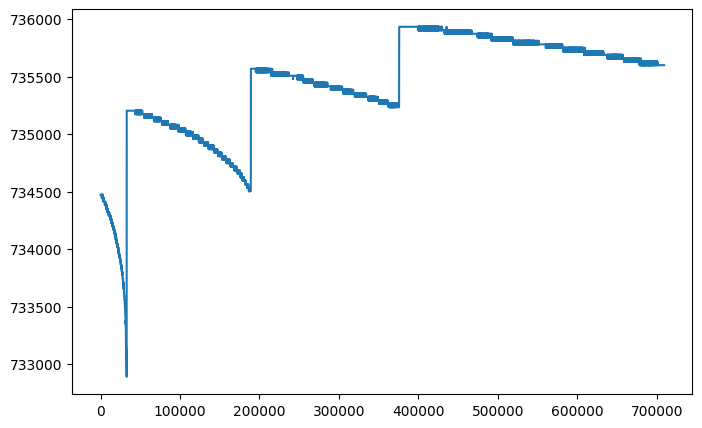

In [ ]:
df['issue_d'].plot(kind='line');

The data needs to be split into 'Train' (June 2007 - 31 May 2015) and 'Out-of-Time Test' (01 June 2015 - Dec 2015) datasets.

In [ ]:
# criterion for the condition
h=pd.to_datetime('2015-06-01'); h
date.toordinal(h)    # split value is 735750

Timestamp('2015-06-01 00:00:00')

735750

In [ ]:
# condition for IN sample data
cnd1 = (df['issue_d'] < 735750)
cnd1.value_counts()
# True     497568
# False    211894

,count
issue_d,
True,497568
False,211894


In [ ]:
# condition for OUT sample data
cnd2 = (df['issue_d'] >= 735750)
cnd2.value_counts()
# True     211894
# False    497568

,count
issue_d,
False,497568
True,211894


####               CREATE IN-SAMPLE AND OUT-SAMPLE DATA

In [ ]:
A = df.loc[cnd1]; A.shape     # (497568, 44) ...IN
B = df.loc[cnd2]; B.shape     # (211894, 44) ...OUT

(497568, 44)

(211894, 44)

####              CREATE  OUT-SAMPLE DATA FOR SUBMISSION FILE

In [ ]:
df_submission = df_sub.loc[cnd2]; df_submission.shape   # (211894, 3)

(211894, 3)

In [ ]:
df_submission.info(); df_submission.head(); df_submission.tail()

<class 'pandas.core.frame.DataFrame'>
Index: 211894 entries, 375800 to 609791
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   id           211894 non-null  int64  
 1   loan_amnt    211894 non-null  float64
 2   default_ind  211894 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 6.5 MB


,id,loan_amnt,default_ind
375800,68587652,25000.0,0
375801,66624733,18000.0,0
375802,68446769,7000.0,0
375803,68587491,15000.0,0
375804,68616867,16000.0,0


,id,loan_amnt,default_ind
607859,47877343,12000.0,0
607959,46848164,10800.0,0
608306,47471631,25000.0,0
609003,46735363,25000.0,0
609791,47058483,24675.0,0


####  SAMPLE DATASET FOR TESTrun

In [ ]:
'''
# samples for code testing
A = A.sample(n=20000,replace="False"); A.shape # (20000, 52)
B = B.sample(n=10000,replace="False"); B.shape # (10000, 52)  '''

'''
A = A.sample(frac=0.1, replace="False", random_state=42); A.shape  # (59852, 44)
B = B.sample(frac=0.1, replace="False", random_state=42); B.shape  # (25686, 44)  '''

##  6: CREATE X AND Y SPLIT FOR IN AND OUT DATA     <a id="6"></a>

In [ ]:
Xi = A.drop('default_ind', axis=1); type(Xi); Xi.shape    # (497568, 43)
Yi = A.loc[:][['default_ind']]; type(Yi); Yi.shape        # (497568, 1)

Xo = B.drop('default_ind', axis=1); type(Xo); Xo.shape    # (211894, 43)
Yo = B.loc[:][['default_ind']]; type(Yo); Yo.shape        # (211894, 1)

pandas.core.frame.DataFrame

(497568, 43)

pandas.core.frame.DataFrame

(497568, 1)

pandas.core.frame.DataFrame

(211894, 43)

pandas.core.frame.DataFrame

(211894, 1)

In [ ]:
# needed later for object persistence
colY = Yi.columns.values ; len(colY); colY
colnames = Xi.columns.values ; len(colnames); colnames

1

array(['default_ind'], dtype=object)

43

array(['loan_amnt', 'term', 'int_rate', 'grade', 'issue_d', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'monthly_inc',
       'EMI', 'tot_bal', 'home_ownership_ANY', 'home_ownership_MORTGAGE',
       'home_ownership_NONE', 'home_ownership_OTHER',
       'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Not Verified',
       'verification_status_Source Verified',
       'verification_status_Verified', 'purpose_car',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy',
       'purpose_small_business', 'purpose_vacation', 'purpose_wedding',
       'initial_list_status_f', 'initial_list_status_w'], dtype=object)

In [ ]:
#               MINMAXSCALER FOR UNIVARIATE FS
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
Xm = min_max_scaler.fit_transform(Xi)

In [ ]:
#               STANDARDIZATION OF X VARIABLES
# StandardScaler outputs Gaussian values (with 0 mean and unit variance)
from sklearn.preprocessing import StandardScaler
scalerXi = StandardScaler()
scalerXo = StandardScaler()

In [ ]:
scalerXi.fit(Xi)   # creates a range
Xi = scalerXi.transform(Xi)
print(Xi)

StandardScaler()

[[-1.12484508 -0.62004528 -0.6461981  ... -0.06227172  0.8059861
  -0.8059861 ]
 [-1.45751202 -0.62004528  0.59555453 ... -0.06227172  0.8059861
  -0.8059861 ]
 [-0.48510097 -0.62004528  0.01794079 ... -0.06227172  0.8059861
  -0.8059861 ]
 ...
 [-0.10125451  1.61278545  0.60257008 ... -0.06227172 -1.24071618
   1.24071618]
 [-0.22920333  1.61278545  1.53797696 ... -0.06227172 -1.24071618
   1.24071618]
 [ 0.79438724 -0.62004528 -0.33283679 ... -0.06227172  0.8059861
  -0.8059861 ]]


In [ ]:
scalerXo.fit(Xo)   # creates a range
Xo = scalerXo.transform(Xo)
print(Xo)

StandardScaler()

[[ 1.34233957 -0.68105918 -1.69689124 ... -0.00217241 -0.67903315
   0.67903315]
 [ 0.46815968  1.46830119  1.70342254 ... -0.00217241 -0.67903315
   0.67903315]
 [-0.90555159 -0.68105918 -1.17579796 ... -0.00217241 -0.67903315
   0.67903315]
 ...
 [ 1.34233957 -0.68105918  0.99982654 ... -0.00217241 -0.67903315
   0.67903315]
 [ 1.34233957 -0.68105918 -1.37030743 ... -0.00217241 -0.67903315
   0.67903315]
 [ 1.30175265  1.46830119 -1.0101047  ... -0.00217241 -0.67903315
   0.67903315]]


###               CREATE DATA PARTITION (TRAIN AND VALIDATION DATA)

In [ ]:
Yi = Yi.astype(int)    # LgR expeact Y to be integer
Yo = Yo.astype(int)

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into train and validation set
Xt, Xv, Yt, Yv = train_test_split(Xi, Yi, test_size=0.2, random_state=42)

print(Xt.shape)      # (398054, 43)
print(Xv.shape)      # (99514, 43)

(398054, 43)
(99514, 43)


####  CHECKING THE PROPORTION OF 0's AND 1's IN THE SPLIT DATASETS

In [ ]:
# Check level count of Train-Validate-Out Dataset
t1 = Yt.iloc[:,0].value_counts(); t1
print( "For Train Set, Ratio of  0:1 ==>> ", np.round(100*t1[0]/(t1[0]+t1[1]),2),":", np.round(100*t1[1]/(t1[0]+t1[1]),2))
t1 = Yv.iloc[:,0].value_counts(); t1
print( "For Val Set, Ratio of  0:1 ==>> ", np.round(100*t1[0]/(t1[0]+t1[1]),2),":", np.round(100*t1[1]/(t1[0]+t1[1]),2))
t1 = Yo.iloc[:,0].value_counts(); t1
print( "For Out Set, Ratio of  0:1 ==>> ", np.round(100*t1[0]/(t1[0]+t1[1]),2),":", np.round(100*t1[1]/(t1[0]+t1[1]),2))

,count
default_ind,
0,367813
1,30241


For Train Set, Ratio of  0:1 ==>>  92.4 : 7.6


,count
default_ind,
0,91893
1,7621


For Val Set, Ratio of  0:1 ==>>  92.34 : 7.66


,count
default_ind,
0,211642
1,252


For Out Set, Ratio of  0:1 ==>>  99.88 : 0.12


###  DOWNSAMPLING THE TRAIN DATA USING RandomUnderSampler

In [ ]:
Yt['default_ind'].value_counts()
rus = RandomUnderSampler(sampling_strategy={0:183906}, random_state=42)
Xt, Yt = rus.fit_resample(Xt,Yt)
np.unique(Yt, return_counts=True)

,count
default_ind,
0,367813
1,30241


(array([0, 1]), array([183906,  30241]))

In [ ]:
Xt.dtype; type(Yt)
Xt = pd.DataFrame(Xt); type(Xt)
Yt = pd.DataFrame(Yt); type(Yt)

dtype('float64')

pandas.core.frame.DataFrame

pandas.core.frame.DataFrame

pandas.core.frame.DataFrame

###  BALANCING THE TRAIN DATA USING SMOTE

In [ ]:
# set variables for SMOTE
sm = SMOTE(sampling_strategy={1:183906}, random_state=42, n_jobs=3)

# resample data and classes
Xt, Yt = sm.fit_resample(Xt,Yt)
Xt.shape    # (367812, 43)
Yt.shape    # (367812, 1)

(367812, 43)

(367812, 1)

####   COUNT & RATIO of 0:1 in Yt TRAIN DATA

In [ ]:
t2 = np.unique(Yt, return_counts=True); t2    #  [0,1]:[183906, 183906]
print( "For Train Set, Ratio of  0:1 ==>> ", \
      np.round(100*t2[1][0]/(t2[1][0]+t2[1][1]),2),":", np.round(100*t2[1][1]/(t2[1][0]+t2[1][1]),2))

(array([0, 1]), array([183906, 183906]))

For Train Set, Ratio of  0:1 ==>>  50.0 : 50.0


## 7: SAVING THE DATASET FOR DOWNLINE PROCESSING       <a id="7"></a>

In [ ]:
type(Xt); type(Yt)
type(Xv); type(Yv)
type(Xo); type(Yo)
type(Xm); type(Yi)
type(df_submission)

pandas.core.frame.DataFrame

pandas.core.frame.DataFrame

numpy.ndarray

pandas.core.frame.DataFrame

numpy.ndarray

pandas.core.frame.DataFrame

numpy.ndarray

pandas.core.frame.DataFrame

pandas.core.frame.DataFrame

In [ ]:
Xt.columns = colnames; type(Xt)
Xv = pd.DataFrame(Xv, columns=colnames); type(Xv)
Xo = pd.DataFrame(Xo, columns=colnames); type(Xo)
Xm = pd.DataFrame(Xm, columns=colnames); type(Xm)

pandas.core.frame.DataFrame

pandas.core.frame.DataFrame

pandas.core.frame.DataFrame

pandas.core.frame.DataFrame

In [ ]:
lsta = [Xt,Yt,Xv,Yv,Xo,Yo,Xm,Yi,df_submission]
for i in lsta: print(i.shape," ", type(i)); i.index; i.head(2); i.tail(2)

(367812, 43)   <class 'pandas.core.frame.DataFrame'>


RangeIndex(start=0, stop=367812, step=1)

,loan_amnt,term,int_rate,grade,issue_d,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,monthly_inc,EMI,tot_bal,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_f,initial_list_status_w
0,-0.229203,1.612785,1.362588,1.743227,0.891014,1.220382,-0.358395,-0.766066,0.790200,-0.330564,0.021966,0.855631,0.541485,-0.09611,-0.061688,-0.812075,-0.716246,-0.784859,-0.001418,1.049376,-0.008854,-0.015467,-0.320697,-0.869447,-0.69943,-0.736398,1.458107,-0.10504,1.847288,-1.224085,-0.022466,-0.234284,-0.06402,-0.141479,-0.09759,-0.079166,-0.22726,-0.026379,-0.109093,-0.073548,-0.062272,-1.240716,1.240716
1,0.794387,1.612785,-0.461455,-0.589153,0.819845,0.929985,-0.358395,-0.766066,0.321438,-0.330564,1.336221,0.213880,-0.147537,-0.09611,-0.061688,0.501230,0.070543,0.513436,-0.001418,1.049376,-0.008854,-0.015467,-0.320697,-0.869447,-0.69943,-0.736398,1.458107,-0.10504,-0.541334,0.816937,-0.022466,-0.234284,-0.06402,-0.141479,-0.09759,-0.079166,-0.22726,-0.026379,-0.109093,-0.073548,-0.062272,0.805986,-0.805986


,loan_amnt,term,int_rate,grade,issue_d,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,monthly_inc,EMI,tot_bal,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_f,initial_list_status_w
367810,-1.347835,-0.620045,1.239918,0.965767,-0.626650,-0.499023,-0.358395,-0.766066,-0.444019,-0.330564,-0.815069,1.334017,-1.354886,-0.09611,-0.061688,-1.428468,-1.362552,-1.373782,-0.001418,-0.952947,-0.008854,-0.015467,-0.320697,1.150156,-0.699430,-0.736398,1.458107,-0.10504,-0.541334,0.816937,-0.022466,-0.234284,-0.06402,-0.141479,-0.09759,-0.079166,-0.22726,-0.026379,-0.109093,-0.073548,-0.062272,0.805986,-0.805986
367811,-1.397581,-0.620045,-0.153145,0.188307,0.866936,0.754121,-0.358395,-0.711716,1.078020,1.586462,-0.264392,0.972684,0.942692,-0.09611,-0.061688,-0.416902,-1.426262,-0.324398,-0.001418,-0.952947,-0.008854,-0.015467,-0.320697,1.150156,1.429735,-0.736398,-0.685821,-0.10504,-0.541334,0.816937,-0.022466,-0.234284,-0.06402,-0.141479,-0.09759,-0.079166,-0.22726,-0.026379,-0.109093,-0.073548,-0.062272,0.805986,-0.805986


(367812, 1)   <class 'pandas.core.frame.DataFrame'>


RangeIndex(start=0, stop=367812, step=1)

,default_ind
0,0
1,0


,default_ind
367810,1
367811,1


(99514, 43)   <class 'pandas.core.frame.DataFrame'>


RangeIndex(start=0, stop=99514, step=1)

,loan_amnt,term,int_rate,grade,issue_d,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,monthly_inc,EMI,tot_bal,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_f,initial_list_status_w
0,-0.740999,-0.620045,0.443551,0.188307,-0.440526,-1.805732,0.893763,-0.766066,-1.084846,-0.330564,-0.766587,-0.245120,-0.639695,-0.09611,-0.061688,0.185261,-0.585124,0.235464,-0.001418,1.049376,-0.008854,-0.015467,-0.320697,-0.869447,-0.69943,-0.736398,1.458107,-0.10504,-0.541334,-1.224085,-0.022466,-0.234284,-0.06402,-0.141479,-0.09759,-0.079166,-0.22726,-0.026379,-0.109093,13.596608,-0.062272,0.805986,-0.805986
1,-0.011690,-0.620045,0.513706,0.965767,0.679804,1.082038,2.145921,0.664194,-0.616085,-0.330564,-0.959993,1.276381,-0.541263,-0.09611,-0.061688,-0.867968,0.349250,-0.921141,-0.001418,-0.952947,-0.008854,-0.015467,-0.320697,1.150156,-0.69943,1.357961,-0.685821,-0.10504,-0.541334,0.816937,-0.022466,-0.234284,-0.06402,-0.141479,-0.09759,-0.079166,-0.22726,-0.026379,-0.109093,-0.073548,-0.062272,-1.240716,1.240716


,loan_amnt,term,int_rate,grade,issue_d,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,monthly_inc,EMI,tot_bal,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_f,initial_list_status_w
99512,-0.61305,-0.620045,0.060034,-0.589153,-0.158147,1.988128,-0.358395,2.094454,1.493342,-0.330564,1.347038,-0.189870,2.411685,-0.09611,-0.061688,0.082327,-0.421193,0.117073,-0.001418,1.049376,-0.008854,-0.015467,-0.320697,-0.869447,-0.69943,1.357961,-0.685821,-0.105040,1.847288,-1.224085,-0.022466,-0.234284,-0.06402,-0.141479,-0.09759,-0.079166,-0.22726,-0.026379,-0.109093,-0.073548,-0.062272,0.805986,-0.805986
99513,0.53849,1.612785,-0.070923,-0.589153,-1.418518,-0.899642,-0.358395,0.664194,1.024581,-0.330564,-1.408463,-2.297871,0.344621,-0.09611,-0.061688,0.360801,-0.126139,0.382910,-0.001418,1.049376,-0.008854,-0.015467,-0.320697,-0.869447,-0.69943,-0.736398,1.458107,9.520144,-0.541334,-1.224085,-0.022466,-0.234284,-0.06402,-0.141479,-0.09759,-0.079166,-0.22726,-0.026379,-0.109093,-0.073548,-0.062272,0.805986,-0.805986


(99514, 1)   <class 'pandas.core.frame.DataFrame'>


Index([ 99433, 216626, 679811, 681938, 158776, 322352, 108846, 659284, 188117,
        52596,
       ...
         9469, 236987, 206842, 637352, 669465,  44952,  89951, 301048,  44980,
       176612],
      dtype='int64', length=99514)

,default_ind
99433,1
216626,0


,default_ind
44980,0
176612,0


(211894, 43)   <class 'pandas.core.frame.DataFrame'>


RangeIndex(start=0, stop=211894, step=1)

,loan_amnt,term,int_rate,grade,issue_d,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,monthly_inc,EMI,tot_bal,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_f,initial_list_status_w
0,1.34234,-0.681059,-1.696891,-1.369549,1.493043,-1.101082,-0.375873,-0.679436,-0.886484,-0.380355,0.667442,-0.433610,-0.522760,-0.13186,-0.068777,2.871429,2.138248,2.810400,-0.003072,1.060829,0.0,0.0,-0.351423,-0.850193,1.547711,-0.850423,-0.632579,-0.095549,1.754049,-1.188795,0.0,-0.252554,-0.056531,-0.137379,-0.101483,-0.077682,-0.225991,-0.022997,-0.086287,-0.075468,-0.002172,-0.679033,0.679033
1,0.46816,1.468301,1.703423,1.784978,1.493043,-1.118499,-0.375873,0.873973,1.592139,1.235356,0.098929,-0.509359,0.367677,-0.13186,-0.068777,2.871429,-0.145085,2.978224,-0.003072,-0.942659,0.0,0.0,-0.351423,1.176204,1.547711,-0.850423,-0.632579,-0.095549,-0.570110,0.841188,0.0,-0.252554,-0.056531,-0.137379,-0.101483,-0.077682,-0.225991,-0.022997,-0.086287,-0.075468,-0.002172,-0.679033,0.679033


,loan_amnt,term,int_rate,grade,issue_d,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,monthly_inc,EMI,tot_bal,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_f,initial_list_status_w
211892,1.342340,-0.681059,-1.370307,-1.369549,-1.570813,-0.655210,-0.375873,-0.679436,0.014833,-0.380355,2.928803,1.657883,-0.819573,-0.13186,-0.068777,1.498597,2.138248,1.392151,-0.003072,1.060829,0.0,0.0,-0.351423,-0.850193,-0.646115,-0.850423,1.580831,-0.095549,1.754049,-1.188795,0.0,-0.252554,-0.056531,-0.137379,-0.101483,-0.077682,-0.225991,-0.022997,-0.086287,-0.075468,-0.002172,-0.679033,0.679033
211893,1.301753,1.468301,-1.010105,-0.580917,-1.570813,0.035659,-0.375873,-0.679436,0.916151,-0.380355,0.047745,-1.144802,0.367677,-0.13186,-0.068777,2.905749,0.498919,2.966345,-0.003072,-0.942659,0.0,0.0,-0.351423,1.176204,-0.646115,-0.850423,1.580831,-0.095549,-0.570110,0.841188,0.0,-0.252554,-0.056531,-0.137379,-0.101483,-0.077682,-0.225991,-0.022997,-0.086287,-0.075468,-0.002172,-0.679033,0.679033


(211894, 1)   <class 'pandas.core.frame.DataFrame'>


Index([375800, 375801, 375802, 375803, 375804, 375805, 375806, 375807, 375808,
       375809,
       ...
       607116, 607332, 607345, 607360, 607439, 607859, 607959, 608306, 609003,
       609791],
      dtype='int64', length=211894)

,default_ind
375800,0
375801,0


,default_ind
609003,0
609791,0


(497568, 43)   <class 'pandas.core.frame.DataFrame'>


RangeIndex(start=0, stop=497568, step=1)

,loan_amnt,term,int_rate,grade,issue_d,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,monthly_inc,EMI,tot_bal,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_f,initial_list_status_w
0,0.130435,0.0,0.270971,0.166667,0.559364,0.691423,0.0,0.5,0.090909,0.0,0.321591,0.657502,0.134615,0.0,0.0,0.135922,0.159011,0.135144,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.055072,0.0,0.540925,0.333333,0.559364,0.218055,0.0,1.0,0.045455,0.0,0.069653,0.773763,0.153846,0.0,0.0,0.059883,0.067141,0.060623,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


,loan_amnt,term,int_rate,grade,issue_d,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,monthly_inc,EMI,tot_bal,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_f,initial_list_status_w
497566,0.333333,1.0,0.745806,0.666667,0.957597,0.679920,0.025641,1.0,0.727273,0.000000,0.194491,0.240377,0.346154,0.05,0.0,0.397411,0.236748,0.406803,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
497567,0.565217,0.0,0.339095,0.166667,0.957597,0.270818,0.000000,0.5,0.318182,0.015873,0.783854,0.626866,0.153846,0.00,0.0,0.627831,0.689051,0.621390,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


(497568, 1)   <class 'pandas.core.frame.DataFrame'>


Index([     0,      1,      2,      3,      4,      5,      6,      7,      8,
            9,
       ...
       709452, 709453, 709454, 709455, 709456, 709457, 709458, 709459, 709460,
       709461],
      dtype='int64', length=497568)

,default_ind
0,0
1,0


,default_ind
709460,0
709461,0


(211894, 3)   <class 'pandas.core.frame.DataFrame'>


Index([375800, 375801, 375802, 375803, 375804, 375805, 375806, 375807, 375808,
       375809,
       ...
       607116, 607332, 607345, 607360, 607439, 607859, 607959, 608306, 609003,
       609791],
      dtype='int64', length=211894)

,id,loan_amnt,default_ind
375800,68587652,25000.0,0
375801,66624733,18000.0,0


,id,loan_amnt,default_ind
609003,46735363,25000.0,0
609791,47058483,24675.0,0


In [ ]:
Xt.to_csv(path + '/Xtrn.csv', encoding='utf-8',index=False)
Xv.to_csv(path + '/Xval.csv', encoding='utf-8',index=False)
Xo.to_csv(path + '/Xout.csv', encoding='utf-8',index=False)
Xm.to_csv(path + '/Xmm.csv', encoding='utf-8',index=False)
Yt.to_csv(path + '/Ytrn.csv', encoding='utf-8',index=False)
Yv.to_csv(path + '/Yval.csv', encoding='utf-8',index=False)
Yo.to_csv(path + '/Yout.csv', encoding='utf-8',index=False)
Yi.to_csv(path + '/Yin.csv', encoding='utf-8',index=False)
df_submission.to_csv(path + '/submission.csv', encoding='utf-8',index=False)